## 绘制wise比较图 使用多个数据比较

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import os.path
import pandas as pd
hvlist = np.loadtxt('hvlist.txt')
f = open(f'namelist.txt', "r", encoding="utf-8")
str1 = f.read()
namelist = str1.split()
dirlist = ['mcmc17','mcmc19']
clist = [['b','lightsteelblue'], \
            ['r','red'], \
            ['y','khaki'], \
            ['seagreen','lightgreen'], \
            ['m','violet']]
print(namelist,dirlist)
clist[2][1]

['1994CB', '1996GQ', '2002LT24', '2003MA3', '2008NP3', '2009UX17', '2010AJ30', '2010BH115', '2010CA55', '2010CC55', '2010CN141', '2010CO1', '2010DG77', '2010DH77', '2010EX11', '2010FA81', '2010FC81', '2010FH81', '2010GP67', '2010GS7', '2010HW81', '2010HX107', '2010HZ104', '2010JN71', '2010JX16', '2010KP10', '2010KU7', '2010KX7', '2010LH14', '2010LJ68', '2010LK68', '2010LL68', '2010LV108', '2010NS36', '2010NY65', '2010OH126', '2010PU66', '2010PW58', '2010XP69', '2014FD7', '2015TF', '2016UH101', '2019DD2'] ['mcmc17', 'mcmc19']


'khaki'

/tmp/ipykernel_4089235/3139852896.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(x,y,xerr=[xerr1,xerr2],yerr=Wyerr,marker = '.',linestyle="none", fmt="o",color=cl,ecolor=ecl, capsize=1.0)
/tmp/ipykernel_4089235/3139852896.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(x,y,xerr=[xerr1,xerr2],yerr=Wyerr,marker = '.',linestyle="none", fmt="o",color=cl,ecolor=ecl, capsize=1.0)


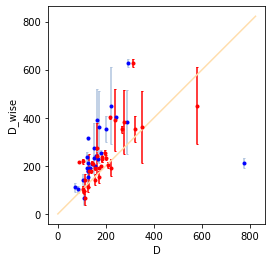

In [32]:
md = 500
plt.xlabel('D')
plt.ylabel('D_wise')

def getratio(df):
    return (df['D']-df['D_wise'])*100/df['D_wise']

for di in range(len(dirlist)): 
    cl = (clist[di][0])
    ecl = (clist[di][1])
    mcmcdir = dirlist[di]
    df0 = pd.read_excel(f'./ans_excel/{mcmcdir}.xlsx')
    df = df0[['name','eta','wf','pv_wise','pv','D','Dup','Ddown','D_wise','D_wiseErr']]
    df = df.sort_values('D',ascending = False)
    df1 = df
    for ii in range(len(df)):
        if df.loc[ii,'D_wise']>1000 or df.loc[ii,'D_wise']<10 or df.loc[ii,'D']>1000:
            df1 = df1.drop(labels=ii)
    #df1 = df1.drop(labels=28)
    df1.loc[:,'delta/WISE'] = df1.apply(getratio,axis=1)
    md = max(md, df1['D'].max())
    x = df1['D']
    y = df1['D_wise']
    #plt.plot(x,y,marker = '*')
    
    Wyerr = df1['D_wiseErr']
    xerr1 = (df1['D']-df1['Ddown'])
    xerr2 = (df1['Dup']-df1['D'])
    plt.errorbar(x,y,xerr=[xerr1,xerr2],yerr=Wyerr,marker = '.',linestyle="none", fmt="o",color=cl,ecolor=ecl, capsize=1.0)
    #plt.errorbar(x,y,xerr=[xerr1,xerr2],linestyle="none")
    
plt.plot(np.linspace(0,md+50),np.linspace(0,md+50),'navajowhite')
ax = plt.gca()
ax.set_aspect(1)


In [ ]:
plt.savefig(f'./ans_eps/allansfig1.eps')